In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

visa_df=pd.read_csv('visadataset.csv')
cat=visa_df.select_dtypes(include='object').columns
num=visa_df.select_dtypes(exclude='object').columns

In [2]:
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [3]:
#consider two columns
# continent and case status
# we already know that continent has e lables are there
# case status has two lables denied and certified
# how many asia people got certified
# how many asia got denied

In [4]:
continent=visa_df['continent']
case_status=visa_df['case_status']
con1=continent=='Asia'
con2=case_status=='Certified'
con3=con1 & con2
len(visa_df[con3])

11012

In [5]:
lables=visa_df['continent'].unique()
for i in lables:
    con1=visa_df['continent']==i
    con2=visa_df['case_status']=='Certified'
    con3=con1 & con2
    count=len(visa_df[con3])
    print(f'The number of certfied applicants from {i} is: {count}')

The number of certfied applicants from Asia is: 11012
The number of certfied applicants from Africa is: 397
The number of certfied applicants from North America is: 2037
The number of certfied applicants from Europe is: 2957
The number of certfied applicants from South America is: 493
The number of certfied applicants from Oceania is: 122


In [6]:
lables=visa_df['continent'].unique()
certified,denied=[],[]
for i in lables:
    con1=visa_df['continent']==i
    con2=visa_df['case_status']=='Certified'
    con3=visa_df['case_status']=='Denied'
    ceri_con=con1&con2
    den_con=con1&con3
    certified.append(len(visa_df[ceri_con]))
    denied.append(len(visa_df[den_con]))
certified,denied

([11012, 397, 2037, 2957, 493, 122], [5849, 154, 1255, 775, 359, 70])

In [7]:
lables=visa_df['continent'].unique()
certified,denied=[],[]
for i in lables:
    con1=visa_df['continent']==i
    con2=visa_df['case_status']=='Certified'
    con3=visa_df['case_status']=='Denied'
    ceri_con=con1&con2
    den_con=con1&con3
    certified.append(len(visa_df[ceri_con]))
    denied.append(len(visa_df[den_con]))
certified,denied

([11012, 397, 2037, 2957, 493, 122], [5849, 154, 1255, 775, 359, 70])

In [8]:
pd.DataFrame(zip(certified,denied),columns=['Certified','Denied'],index=lables)

,Certified,Denied
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


In [9]:
continent=visa_df['continent']
case_status=visa_df['case_status']
pd.crosstab(continent,case_status)

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


In [10]:
col1=visa_df['continent']
col2=visa_df['case_status']
pd.crosstab(col2,col1)
# col2=case status behave has index
# col1=continent behave as column

continent,Africa,Asia,Europe,North America,Oceania,South America
case_status,,,,,,
Certified,397,11012,2957,2037,122,493
Denied,154,5849,775,1255,70,359


In [11]:
col1=visa_df['continent']
col2=visa_df['case_status']
pd.crosstab(col2,col1)
r1=pd.crosstab(col1,col2)
r2=pd.crosstab(col2,col1)

<Axes: xlabel='continent'>

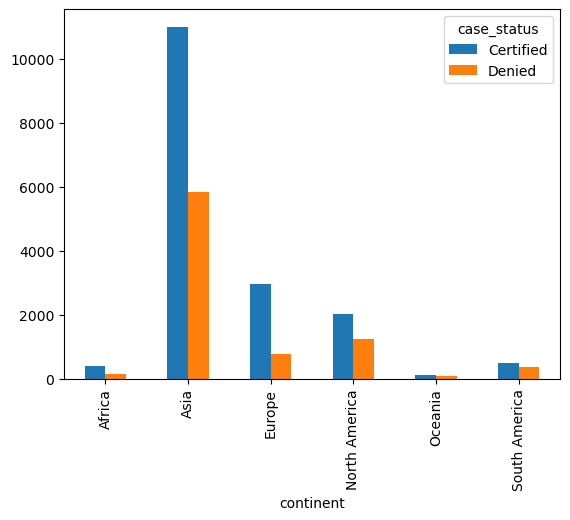

In [12]:
r1.plot(kind='bar')

<Axes: xlabel='case_status'>

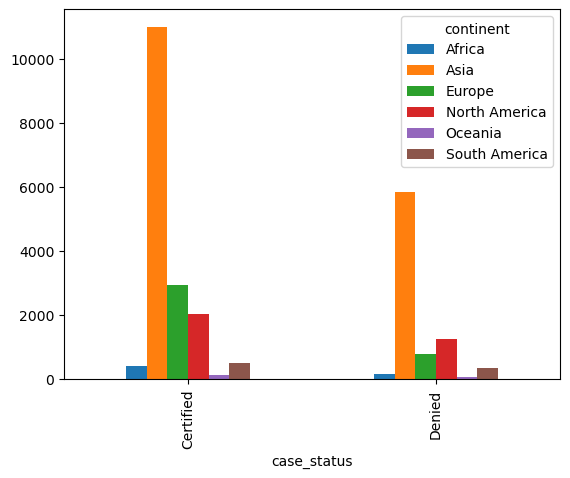

In [13]:
r2.plot(kind='bar')

**Multivariate**

- continent

- education_of_employee

- case_status

- the user should fix which column represent as index

- then other two columns keep in list , and pass in column arguent

In [14]:
col1=visa_df['continent']
col2=visa_df['education_of_employee']
col3=visa_df['case_status']
r1=pd.crosstab(col1,[col2,col3])
r1

education_of_employee Bachelor's        Doctorate        High School         \
case_status            Certified Denied Certified Denied   Certified Denied   
continent                                                                     
Africa                        81     62        43     11          23     43   
Asia                        4407   2761       780    143         676   1614   
Europe                      1040    259       788     58         162    328   
North America                641    584       207     51         210    191   
Oceania                       38     28        19      3          19     17   
South America                160    173        75     14          74     63   

education_of_employee  Master's         
case_status           Certified Denied  
continent                               
Africa                      250     38  
Asia                       5149   1331  
Europe                      967    130  
North America               979    429  
Oceania                      46     22  
South America               184    109

<Axes: xlabel='continent'>

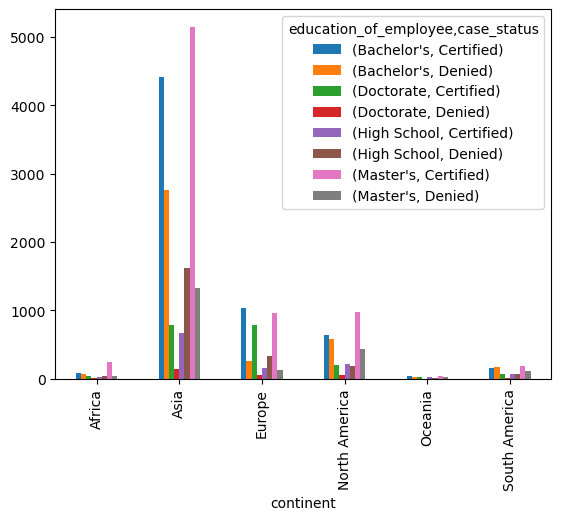

In [15]:
r1.plot(kind='bar')

**numerical v/s numerical**

- scatter plots are used to plot between two numerical column

- it is under matplotlib

- it is represent as plt.scatter()

- scatter plots gives the relation between the two variables

    - positive related
 
    - negative related
 
    - no relation

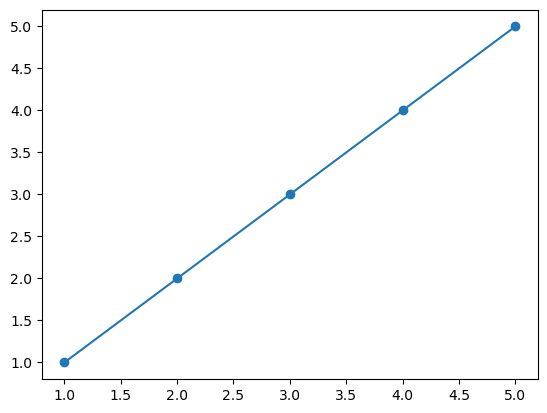

In [16]:
x=[1,2,3,4,5]
y=[1,2,3,4,5]
plt.scatter(x,y)
plt.plot(x,y)

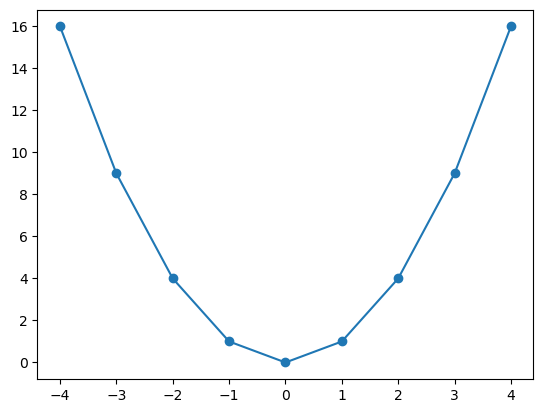

In [17]:
x=[i for i in range(-4,5)]
y=[i*i for i in range(-4,5)]
plt.scatter(x,y)
plt.plot(x,y)

In [18]:
num

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

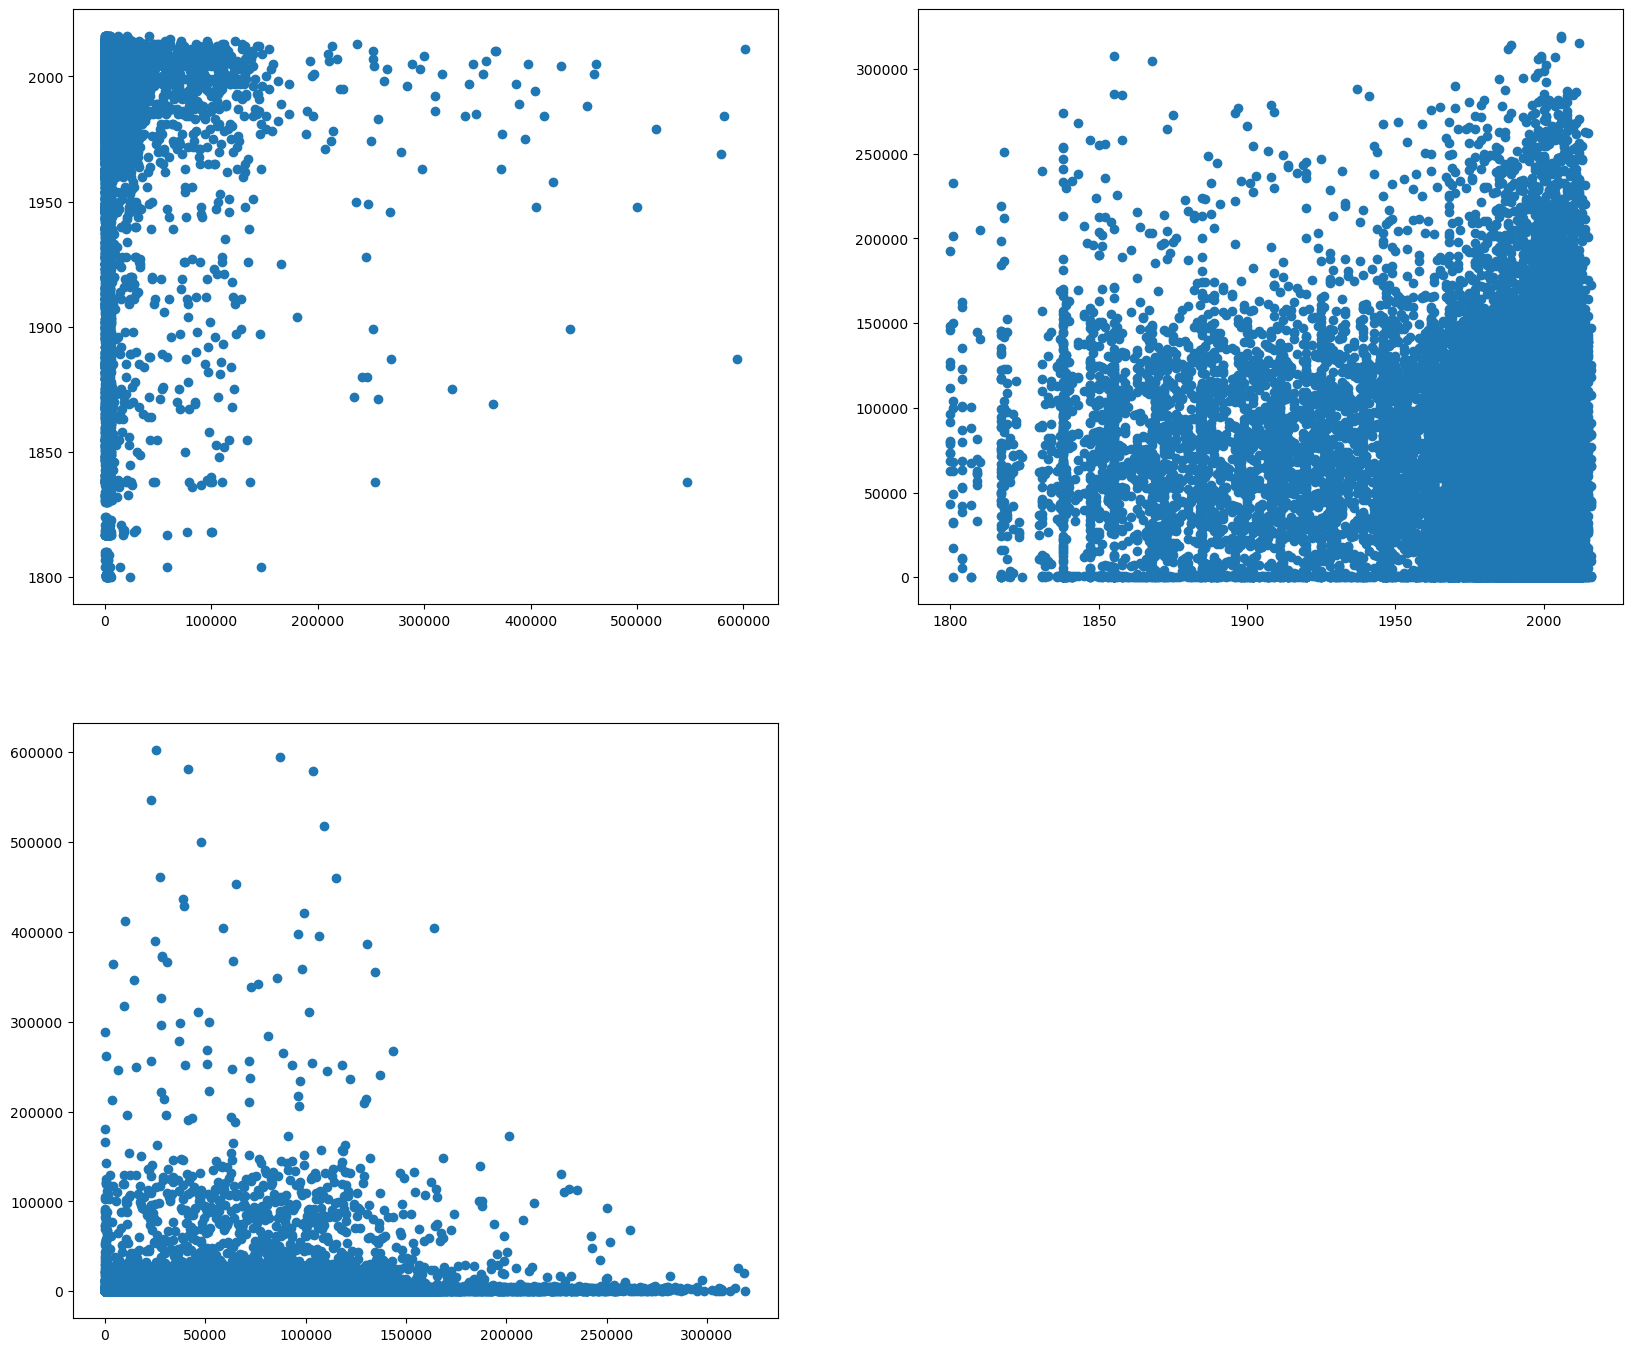

In [19]:
col1=visa_df['no_of_employees']
col2=visa_df['yr_of_estab']
col3=visa_df['prevailing_wage']
plt.figure(figsize=(20,17))
plt.subplot(2,2,1)
plt.scatter(col1,col2)
#plt.plot(col1,col2)
plt.subplot(2,2,2)
plt.scatter(col2,col3)
#plt.plot(col2,col3)
plt.subplot(2,2,3)
plt.scatter(col3,col1)
#plt.plot(col3,col1)

**co-relation**

In [20]:
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


**heatmap**

<Axes: >

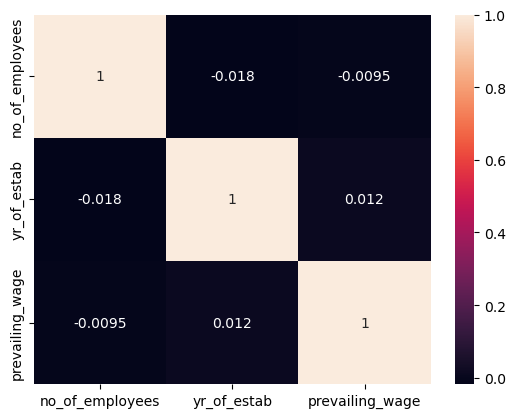

In [22]:
corr=visa_df.corr(numeric_only=True)
sns.heatmap(corr,annot=True)

In [ ]:
# updated seaborn

In [23]:
sns.__version__

'0.13.2'

In [24]:
import seaborn as sns
sns.__version__

'0.13.2'

In [25]:
import sys
sys.version

'3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]'

In [46]:
!pip install --upgrade seaborn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 435.7 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/294.9 kB 465.5 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/294.9 kB 654.9 kB/s eta 0:00:01
   -------------------------- ----------- 204.8/294.9 kB 888.4 kB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.1 MB/s eta 0:00:00


In [26]:
!jupyter --version

Selected Jupyter core packages...
IPython          : 8.20.0
ipykernel        : 6.28.0
ipywidgets       : 7.6.5
jupyter_client   : 8.6.0
jupyter_core     : 5.5.0
jupyter_server   : 2.10.0
jupyterlab       : 4.0.11
nbclient         : 0.8.0
nbconvert        : 7.10.0
nbformat         : 5.9.2
notebook         : 7.0.8
qtconsole        : 5.4.2
traitlets        : 5.7.1


In [45]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
